In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare Distributions and PDFs

In [2]:
std = 5
mean = 10
p = lambda : mean + std * np.random.randn()
p_v = lambda x: 1.0/(std * np.sqrt(2 * np.pi)) * np.exp(-(np.power((x-mean) / std, 2) )/2)

mean of p : 9.987238, std of p : 4.970198


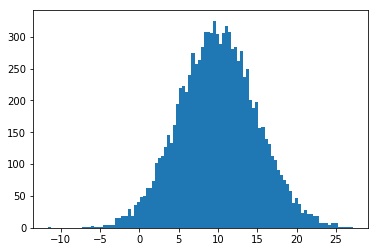

In [3]:
sampled = []
for i in range(10000):
    sampled.append(p())
_ = plt.hist(sampled, 100)
print('mean of p : %f, std of p : %f'%(np.mean(sampled), np.std(sampled)))

In [4]:
std_q = 12
mean_q = 14
q = lambda : mean_q + std_q * np.random.randn()
q_v = lambda x: 1.0/(std_q * np.sqrt(2 * np.pi)) * np.exp(-(np.power((x-mean_q) / std_q, 2) )/2)

mean of q : 13.999716, std of q : 11.985149


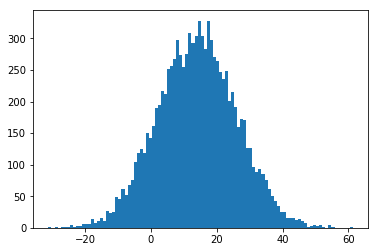

In [5]:
sampled = []
for i in range(10000):
    sampled.append(q())
_ = plt.hist(sampled, 100)
print('mean of q : %f, std of q : %f'%(np.mean(sampled), np.std(sampled)))

# Rejection Sampling

In [6]:
def rejection_sampling(q, p_v, q_v, k=5):
    k = 5
    ret = []
    N = 10000
    for i in range(N):
        sampled_q = q()
        sampled_u = np.random.uniform(low=0.0, high = k* q_v(sampled_q))
        if sampled_u < p_v(sampled_q):
            ret.append(sampled_q) # accept
        else:
            pass # reject
    return ret

In [7]:
sampled = rejection_sampling(q, p_v, q_v, k=5)

In [8]:
np.mean(sampled), np.std(sampled)

(10.008896094665797, 4.964092803248593)

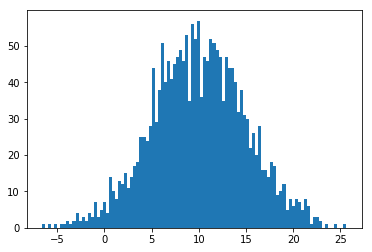

In [9]:
_ = plt.hist(sampled, 100)

# Importance Sampling

In [10]:
def f(x):
    return (x - 2) / 4

def expectation(f, p):
    N = 10000
    ret = 0.0
    for i in range(N):
        ret += f(p())
    ret /= N
    return ret

In [11]:
expectation(f, p)

2.0119798437844674

importance sampling : $ E_{x \text{~} P(X)}\left[ f(x) \right] = E_{x \text{~} Q(X)}\left[ \frac{P(x)}{Q(x)} f(x) \right] $ 

In [12]:
def importance_sampling(f, p_v, q_v, q):
    N = 10000
    ret = 0.0
    for i in range(N):
        sampled_q = q()
        importance_weight = p_v(sampled_q) / q_v(sampled_q)
        ret += importance_weight * f(sampled_q)
    ret /= N
    return ret

In [13]:
importance_sampling(f, p_v, q_v, q)

1.9986658303257685

In [14]:
expectation(f, q), expectation(f, p)

(3.008358669238771, 1.9839379100864092)